# Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

# Q1. Downloading the data

* Data link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".
* Download the data for January and February 2021.

In [1]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet -P ../data
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet -P ../data

--2022-05-20 08:30:27--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.216.185.235
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.216.185.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘../data/fhv_tripdata_2021-01.parquet.6’

fhv_tripdata_2021-0 100%[===================>]  11,33M  1,19MB/s    in 8,9s    

2022-05-20 08:30:37 (1,27 MB/s) - ‘../data/fhv_tripdata_2021-01.parquet.6’ saved [11886281/11886281]

--2022-05-20 08:30:37--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.217.136.33
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.217.136.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘../data/fhv_trip

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df_01 = pd.read_parquet('../data/fhv_tripdata_2021-01.parquet')
df_02 = pd.read_parquet('../data/fhv_tripdata_2021-02.parquet')

In [4]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


**Answer:** The January file has 1154112 entries.

# Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the average trip duration in January?

In [5]:
df_01['duration'] = df_01.dropOff_datetime - df_01.pickup_datetime
df_01.duration = df_01.duration.apply(lambda td: td.total_seconds()/60)
df_01.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [6]:
df_02['duration'] = df_02.dropOff_datetime - df_02.pickup_datetime
df_02.duration = df_02.duration.apply(lambda td: td.total_seconds()/60)
df_02.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037,13.800000


In [7]:
df_01['duration'].mean()

19.1672240937939

**Answer:** The mean duration of a trip in January is 19.16min.

# Data preparation
Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

In [8]:
df_01['duration'].max(), df_01['duration'].min()

(423371.05, 0.016666666666666666)

/home/frauke/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

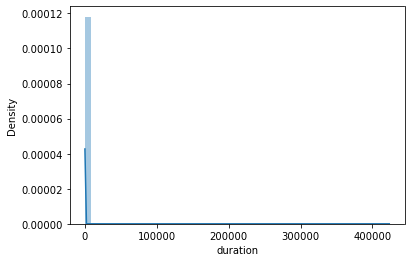

In [9]:
sns.distplot(df_01['duration'])

* remove all values smaller than 1 min and bigger than 60 min. 

In [17]:
df_01 = df_01[(df_01['duration']>=1) & (df_01['duration']<=60)]
df_02 = df_02[(df_02['duration']>=1) & (df_02['duration']<=60)]

/home/frauke/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


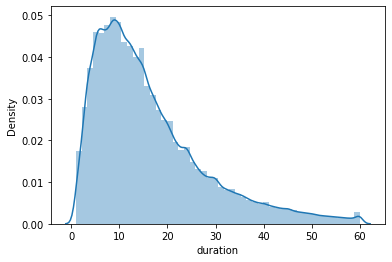

In [18]:
sns.distplot(df_01['duration']);

In [19]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            1109826 non-null  float64       
 4   DOlocationID            1109826 non-null  float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


1109826 values are left. That is we dropped 44286 values.

In [20]:
1154112-1109826

44286

# Q3. Missing values
The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1".

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

In [21]:
df_01['PUlocationID'] = df_01['PUlocationID'].fillna(-1)
df_01['DOlocationID'] = df_01['DOlocationID'].fillna(-1)
df_02['PUlocationID'] = df_02['PUlocationID'].fillna(-1)
df_02['DOlocationID'] = df_02['DOlocationID'].fillna(-1)

In [22]:
(df_01['PUlocationID']==-1).sum()

927008

In [23]:
(df_01['PUlocationID']==-1).sum()/len(df_01)

0.8352732770722617

**Answer:** 83% of the PULocation Ids are NaN.

# Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns).

In [24]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            1109826 non-null  float64       
 4   DOlocationID            1109826 non-null  float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   duration                1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


* Change the type of ```'PUlocationID', 'DOlocationID'``` to string

In [25]:
df_01[['PUlocationID', 'DOlocationID']] = df_01[['PUlocationID', 'DOlocationID']].astype(str)

In [26]:
dv = DictVectorizer()

categorical = ['PUlocationID', 'DOlocationID']
train_dicts = df_01[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_02[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [27]:
dv.feature_names_

['DOlocationID=-1.0',
 'DOlocationID=1.0',
 'DOlocationID=10.0',
 'DOlocationID=100.0',
 'DOlocationID=101.0',
 'DOlocationID=102.0',
 'DOlocationID=105.0',
 'DOlocationID=106.0',
 'DOlocationID=107.0',
 'DOlocationID=108.0',
 'DOlocationID=109.0',
 'DOlocationID=11.0',
 'DOlocationID=111.0',
 'DOlocationID=112.0',
 'DOlocationID=113.0',
 'DOlocationID=114.0',
 'DOlocationID=115.0',
 'DOlocationID=116.0',
 'DOlocationID=117.0',
 'DOlocationID=118.0',
 'DOlocationID=119.0',
 'DOlocationID=12.0',
 'DOlocationID=120.0',
 'DOlocationID=121.0',
 'DOlocationID=122.0',
 'DOlocationID=123.0',
 'DOlocationID=124.0',
 'DOlocationID=125.0',
 'DOlocationID=126.0',
 'DOlocationID=127.0',
 'DOlocationID=128.0',
 'DOlocationID=129.0',
 'DOlocationID=13.0',
 'DOlocationID=130.0',
 'DOlocationID=131.0',
 'DOlocationID=132.0',
 'DOlocationID=133.0',
 'DOlocationID=134.0',
 'DOlocationID=135.0',
 'DOlocationID=136.0',
 'DOlocationID=137.0',
 'DOlocationID=138.0',
 'DOlocationID=139.0',
 'DOlocationID=14.

In [28]:
len(dv.feature_names_)

525

**Answer:** We have 525 features.

# Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

* Train a plain linear regression model with default parameters
* Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [29]:
target = 'duration'
y_train = df_01[target].values
y_val = df_02[target].values

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.5285191072072

# Q6. Evaluating the model
Now let's apply this model to the validation dataset (Feb 2021).

What's the RMSE on validation?

In [31]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

12.855086716472458